# Logistic Regression
* author: "Johnny Chiu"
* date: "11/7/2017"

## Table of content

* Logistics Regression
    * The idea behind logistics regression model
    * The interpretaion of $\beta_1$ in logistics regression
    * Estimating the regression coefficients
    * 
* Multinomial Logistics Regression
    * Logistics Regression for Nominal Response
    * Bayes Classification
    * Logistics Regression for Ordinal Response



---

## Logistics Regression

### • The idea behind logistics regression model

Logistic Regression is useful when the outcome of our regression model is categorical.
Instead of using y, which we assume the value of it is categorical like {0,1}, {yes, no}, directly as our response variable, we models the probability that y belongs to a particular category. In other words, we build up a linear model on the log-odds (or logit). In the following paragraph, we denote the probability that y belongs to a particular category as $p(X) = Pr(Y=1|X)$ 

Since $p(X)$ is the probability that y belongs to a particular category, the value of it should be between 0 and 1. Therefore, we must model p(X) using a function that gives outputs between 0 and 1. Many functions meet this description. In logistic regression, we use the logistic function:

$$ p(X)= \frac{e^{\beta_0+\beta_1X}}{1+e^{\beta_0+\beta_1X}}  $$

We can easily see that the output value of this model is within 0 and 1. When $\beta_0+\beta_1X$ goes to $\infty$, $p(X)$ will be 1; When $\beta_0+\beta_1X$ goes to -$\infty$, $p(X)$ will be 0.

This is the model that we are going to use to build up our regression model on. To make the equation to become more interpretable, after a bit of manipulation, we can get the following one:

$$ log(\frac{p(X)}{1-p(X)})= \beta_0+\beta_1X $$

In the left hand side of the equation, it is the log odd of the probability that y belongs to a particular category. For example, if the probability of a success event is 0.8, then the odd ratio will be 4. The higher odds we get, the more likely we will get a success event. 

The left-hand side is called the log-odds or logit, which is also the link function of logistics regression. We see that the logistic regression has a logit that is linear in $X$.

For the illustration purpose, we can see the Example 6.3 from the textbook *Predictive Analytics: Paramertic Models for Regression and Classificantion*

We can see that the model is fitted using the log odd as y and the Eduation level as x. When eduation level increase from 1 to 2, then the log odd of visit is increased by $\beta_1$.

![](_pic/example_6.3_1.png)
![](_pic/example_6.3_2.png)
![](_pic/example_6.3_3.png)

### • The interpretaion of $\beta_1$ in logistics regression

The above equation also equals:

$$ \frac{p(X)}{1-p(X)}= e^{\beta_0+\beta_1X}  $$

Here we assume that the $beta_1$ we get is 0.3. From the above equation, we can see that when $x$ is increased by 1 unit, the odd ratio will increase by $e^{\beta_1}$=`r exp(0.3)`. $\beta_1$ means how much the log odd ratio will increase if our predictor $x$ is increased by 1 unit. In other words, if $x$ is increased by 1 unit, then the odds ratio will increase by $e^{\beta_1}$. We can also get the increased probability of success from the increased odd ratio we get. For example, if the original $p(X)$ is 0.8, then our odds ratio is 4. When we increased x by 1, the odds ratio increased by $e^{\beta_1}$=`r exp(0.3)`. Therefore, the increased odd ratio is `r 4*exp(0.3)`. We can then get that our increased $p(X)$ is `r 4*exp(0.3)/(1+4*exp(0.3))`. 

### • Estimating the regression coefficients

***Why can't we use least square method to estimate the coefficient for logistic regression?***

If we follow the same formula as linear regression, then the cost function is

$$\sum_{i=1}^{n} \Big( y_i - log(\frac{y_i}{1-y_i}) \Big)^2$$

The log term is either -$\infty$ if $y_i=0$ or $\infty$ if $y_i=1$. Even in the case that the response y is grouped, which means that we are trying to predict the success probability for each group, if the response for all the observations of $x_i$ within the group goes to 1, then log term will still be $\infty$. Therefore, least square method cannot be used. To estimate the coefficient, we will need to use MLE method introduce as follows.

***What is Maximum Likelihood Estimation(MLE)?***

To explain MLE intuitively, we can think of it as this way:
According to the observed fact, what is the process(or parameters) that will maximize the probability for us to get this outcome?
There is one explaination from Quora that explain it very well:

*You only get to see what the nature wants you to see. Things you see are facts. These facts have an underlying process that generated it. These process are hidden, unknown, needs to be discovered. Then the question is: Given the observed fact, what is the likelihood that process P1 generated it? What is the likelihood that process P2 generated it? And so on... One of these likelihoods is going to be max of all. MLE is a function that extracts that max likelihood.* 

*Think of a coin toss; coin is biased. No one knows the degree of bias. It could range from o(all tails) to 1 (all heads). A fair coin will be 0.5 (head/tail equally likely). When you do 10 tosses, and you observe 7 Heads, then the MLE estimator for the prob of head of this coin is 0.7.*

*Think of a stock price of say, British Petroleum. BP was selling at \$59.88 on April 23, 2010. By June 25, 2010 the price was down to \$27.02. There could be several reasons for this fall. But the most likely reason could be the BP oil spill and the public sentiment. Stock price is the observed fact. The MLE will estimate the most likely underlying reason.*

For example, if we have drawn 5 samples from a population, assume all the 5 samples are drawn from normal independent distribution, i.e., $Y_i ~ NID(\mu, \alpha^2)$, then the joint p.d.f. of $Y_1, \dots, Y_n$ is the multiply of the five p.d.f. When we view the joint pdf of $Y_1, \dots, Y_n$ as a function of $\mu$ and $\alpha$, it's actually the likelihood function, which is the probabilty that these 5 samples are drawn from the normal distribution with some certain $\mu$ and $\alpha$.

Another example is that when we flip a coin for 4 times, with 3 head and 1 tail. What is the MLE estimator for the probabilty that the coin will show us head? The marginal distribution of $Y_i$ is $p_i$ when $y_i=head$ and $1-p_i$ when $y_i=tail$. Therefore, the joint pdf(aka likelihood function) is $p^3(1-p)$. By taking partial derivative and set it to 0 with respect to p, we can get our MLE of p to be 3/4.

***How to use MLE to estimate the coefficient of logistic regression?***

We are trying to find estimtaes for $\beta_0$ and $\beta_1$, when we plug in these estimators into the our first equation above, yields a number close to 1 for all the observed y equals to 1; close to 0 for all observed y equals to 0. We can formulized the likelehood function $L$ as following:

$$ L = L(\beta_0, \beta_1) = \displaystyle\prod_{i=1}^{n} \Big[ (p_i)^{y_i}(1-p_i)^{1-y_i} \Big] = \displaystyle\prod_{i=1}^{n} \Big( \frac{p_i}{1-p_i} \Big)^{y_i} \times \prod_{i=1}^{n} (1-p_i)$$

By taking log from both side
$$ ln(L) = \displaystyle\sum_{i=1}^{n} y_i ln\Big( \frac{p_i}{1-p_i}\Big) + \sum_{i=1}^{n} ln(1-p_i) =  \displaystyle\sum_{i=1}^{n} y_i(\beta_0+\beta_1 x_i) -  \sum_{i=1}^{n} ln(1+ exp(\beta_0+\beta_1x_i)) $$

The maximizing values can be found by setting the partial derivatives of $ln(L)$ with respect to $\beta_0$ and $\beta_1$.

The main idea behind it is that for each observation, we are estimating a probability using the logistic function. Therefore, we can get an estimated probabilty for each observation. If the observed response for the observation is 1, then the estimated probabilty is $logisticFunction(x_i)$, where $\beta_0$ and $\beta_1$ is used in the logistic function. The likelihood of the observation will be the product of every observation. By taking the log of the likelihood function, it will be easier for us to do partial derivative and get the estimated $\beta$s.

### • Evaluating the correctness of the model

***What are sensitivity, specifity, recall, precision and what is the rationale behind it?***
![](_pic/precision_recall.png)

* **Precision**: tp/(predicted positive) = tp/(tp + fp)
* **Recall, Sensitivity**: tp/(real positive) = tp/(tp + fn)
* **Specificity**: tn/(real negative)
* **F1 score**: $\frac{2PR}{P+R}$

There is usually a tradeoff between precision and recall. Since if we want to get as much people as possible from the real positive cases, we can just predict everyone to be +. The recall will be 1. However, the precision will be low. Since out of the total predictive +, the true positive will be only small proportion of it. In other words, there will be lots of False positive.

Let's take a typical cancer screening for example. When will we want to use Recall or Precision as our measure metric?
If we have very expensive secondary cancer test, we would probably prefer precision to recall. When precision is high, it means that when I predict a patient has cancer, then the result is highly reliable(False positive is low). The tradeoff is that we may have chances that a person has cancer but we don’t predict it(We may have a high false negative). That’s why in this case, we may prefer precision to recall.

If we have cheap secondary cancer test, and we can afford send lots of people to do this test. Then we would probably like our model to predict as more suspicious people as possible, and send them to do this test. In other words, we want high Recall, we want to get as much people as possible out of the real + cases(We may have a high false postive, but it's ok, since the cancer test is cheap and we can afford it).

To sum up, when we use Recall as the measure, we prefer low false negative than high false positive, i.e, we prefer to get as many people to get the cancer test than ignore anyone who might have a cancer but we don't test it; when we use Precision as the measure, we prefer low false positive than high falsh negative, i.e., we prefer whenever we say a patient has cancer, we say it with high confidence, and there may be a lot of potential having cancer patient that we do not test on them.



***What is ROC curve?***

The ROC curve is created by plotting the true positive rate (TPR=$\frac{tp}{\text{#real positive cases}}$, i.e. Sensitivity) against the false positive rate (FPR=$\frac{fp}{\text{#real negative cases}}$, i.e. 1-Specificity) at various threshold settings. 

In the perfect case, where the distribution is perfectly separate for positve and negative cases, the Area under curve(AUC) is 1. In the case that the two distribution is overlapping, the curve will be a straight line with AUC 0.5.

### • An example of building binary logistic regression
![](_pic/binary_logistic_example.png)

***Answer(1)***

In [1]:
# Make Dataframe
df = data.frame(days=c(21,24,25,26,28,31,33,34,35,37,43,49,51,55,25,29,43,44,46,46,51,55,56,58),
                response=c(rep(1,14),rep(0,10)))

# Fit binary logistic regression
fit = glm(response ~ days, family=binomial, data=df)
summary(fit)


Call:
glm(formula = response ~ days, family = binomial, data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9141  -0.9818   0.5792   0.8411   1.5923  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  3.81944    1.83518   2.081   0.0374 *
days        -0.08648    0.04322  -2.001   0.0454 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 32.601  on 23  degrees of freedom
Residual deviance: 27.788  on 22  degrees of freedom
AIC: 31.788

Number of Fisher Scoring iterations: 4


***Answer(2)***

From the result of our model, we can see that the 95% CI for $\beta_{days}$=

$$ -0.08648 \pm 1.96 \times 0.04322 = [-0.1711912, -0.0017688] $$
Therefore, a 95% CI on the odds ratio equals the exponential of it, which is 
$$[exp(-0.1711912), exp(-0.0017688)] = [0.8426604, 0.9982328]   $$

***Answer(3)***

In [11]:
predict_response = predict(fit, newdata=df, type='response')
real_response = df$response

compare_df = data.frame(real = real_response, predict = predict_response)
head(compare_df)

real,predict
1,0.8811429
1,0.8511753
1,0.8398841
1,0.8279095
1,0.8018532
1,0.7573984


The predicted value for the 24 patients in the sample is shown in the table above in the predict column

In [6]:
get_optimal_p <- function(real_response, predict_response, p_threshold_list){
  max_ccr= 0
  optimal_p = 0
  for (p in p_threshold_list){
    pred = rep(0, 24)
    pred[predict_response > p]=1
    ccr = sum(diag(table(real=real_response, pred)))/ 24
    
    if (ccr > max_ccr){
      max_ccr= ccr
      optimal_p = p
    }
  }
  
  
  pred = rep(0, 24)
  pred[predict_response > optimal_p]=1
  confusion_table=table(real=real_response, pred)

  confusion_table=table(real=real_response, pred)
  sensitivity=confusion_table[2,2]/(confusion_table[2,1]+confusion_table[2,2])
  specificity=confusion_table[1,1]/(confusion_table[1,1]+confusion_table[1,2])
  precision=confusion_table[2,2]/(confusion_table[1,2]+confusion_table[2,2]) 
  f1_score=2*precision*sensitivity/(precision+sensitivity)
  
  return(data.frame(p=optimal_p, 
              ccr=max_ccr,
              sensitivity=sensitivity, 
              specificity=specificity,
              f1_score=f1_score))
}

The sensitivity, specificity and the F1 score fo the optimal p∗ is shown in the table below

In [9]:
library(knitr)
optimal = get_optimal_p(real_response, predict_response, seq(0.3,0.7,0.01))

kable(optimal)



|    p|  ccr| sensitivity| specificity|  f1_score|
|----:|----:|-----------:|-----------:|---------:|
| 0.51| 0.75|   0.7857143|         0.7| 0.7857143|

***Answer(4)***


Call:
glm(formula = response ~ days, family = binomial, data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9141  -0.9818   0.5792   0.8411   1.5923  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  3.81944    1.83518   2.081   0.0374 *
days        -0.08648    0.04322  -2.001   0.0454 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 32.601  on 23  degrees of freedom
Residual deviance: 27.788  on 22  degrees of freedom
AIC: 31.788

Number of Fisher Scoring iterations: 4


Area under the curve: 0.75

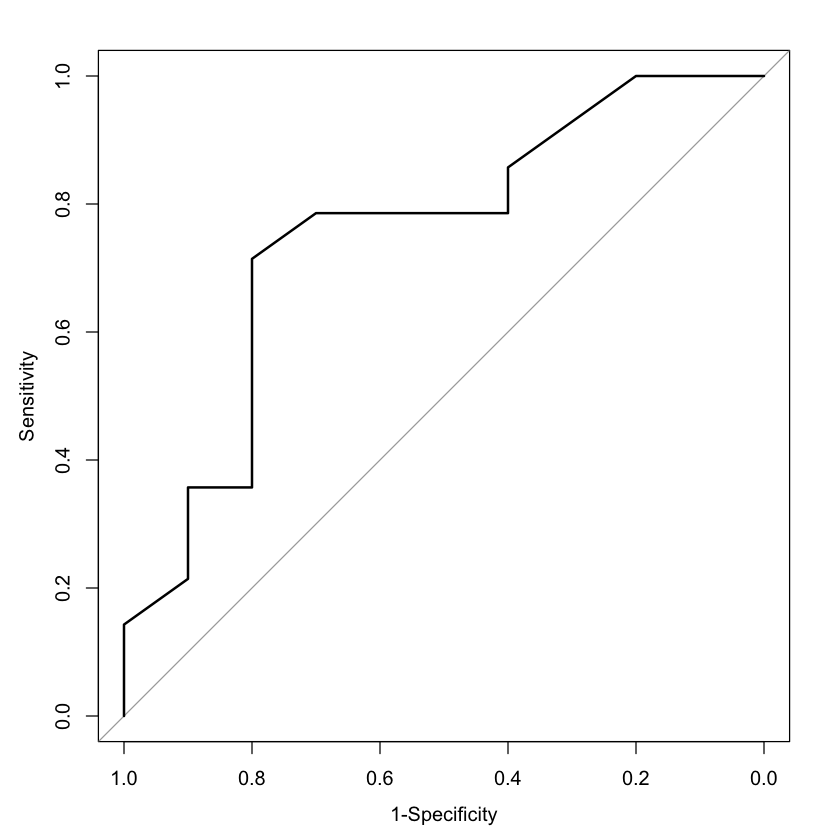

In [12]:
library(pROC)

summary(fit)
plot.roc(real_response, fit$fitted.values, xlab="1-Specificity")



my_auc = auc(real_response, fit$fitted.values)
my_auc

The AUC is **0.75**

---

## Multinomial Logistics Regression
For the data that the outcome is nominal or ordinal, we cannot apply binary logistic regression to our data anymore. One reason is that usually both types of data have more than 2 categories, and ordinal data is a categorical, statistical data type where the variables have natural, ordered categories and the distances between the categories is not known.

Let's see how we can build a regression model on these types of data.

### • Logistics Regression for Nominal Response
Let's assume that we have 3 categorical responses(A,B,C) and 6 predictors including the intercept now. How do we build up a logistic regression model on it? One way to do it is to set one response category as reference and compare the probabilities of the remaining 2 responses to it. Let's denote the probability of response $y=k$ by $p_k=p_k(x)$, and set category $C$ as the reference. Then we have the following equations

$$ 
\begin{cases}
    ln(\frac{p_a}{p_c})=\beta_{0a}+\beta_{1a}x_1+ \beta_{2a}x_2 + \beta_{3a}x_3 + \beta_{4a}x_4 + \beta_{5a}x_5       & \quad \text{for category A}\\
    ln(\frac{p_b}{p_c})=\beta_{0b}+\beta_{1b}x_1+ \beta_{2b}x_2 + \beta_{3b}x_3 + \beta_{4b}x_4 + \beta_{5b}x_5  & \quad \text{for category B }
  \end{cases}
$$
More generally, we can rewrite it as:

$$ ln(\frac{p_k}{p_c})=\beta_{0k}+\beta_{1k}x_1+ \beta_{2k}x_2 + \beta_{3k}x_3 + \beta_{4k}x_4 + \beta_{5k}x_5   \quad \text{for k = a, b} $$
Therefore, in our example, we will need to estimate $(3-1)*6=12$ different $\beta$'s to build up a model.

***How do we interpret the meaning of all the $\beta_{ik}$ in the nominal logistic regression model?***

The explanation is quoted from the textbook *Predictive Analytics: Paramertic Models for Regression and Classificantion* explain it very well:

"The interpretation of the coefficient $\beta_{ik}$ is similar to that of the $\beta_1$ coefficient for binary logistic regression. It is the change in the log-odds of response $k$={a or b} relative to that of the regerence category c when the predictor variable $x_{i}$ is increased by one unit keeping all other variables fixed. 

As an example, suppose $\beta_{ik}$ then $exp(0.5)=1.649$. Hence the odds of outcome $k$ vesus outcome $c$ increased by a factor of $1.649$ if $x_i$ is increased by one unit"

***How to get the predicted probability for different category responses?***

From the above equation, it follows that 
$$ p_k = p_c e^{\beta_{0k}+\beta_{1k}x_1+ \beta_{2k}x_2 + \beta_{3k}x_3 + \beta_{4k}x_4 + \beta_{5k}x_5}  $$
If we denote category {A,B,C} as {1,2,3}, since $\displaystyle\sum_{k=1}^{3} p_k = 1$, we can see that

$$ \displaystyle\sum_{k=1}^{3} p_k = p_a + p_b + p_c = p_c e^{\beta_{0a}+\beta_{1a}x_1+ \beta_{2a}x_2 + \beta_{3a}x_3 + \beta_{4a}x_4 + \beta_{5a}x_5} +p_c e^{\beta_{0b}+\beta_{1b}x_1+ \beta_{2b}x_2 + \beta_{3b}x_3 + \beta_{4b}x_4 + \beta_{5b}x_5} + p_c = 1  $$
By solving $p_c$, we can get 

$$ p_c = \frac{1}{1+ e^{\beta_{0a}+\beta_{1a}x_1+ \beta_{2a}x_2 + \beta_{3a}x_3 + \beta_{4a}x_4 + \beta_{5a}x_5} +  e^{\beta_{0b}+\beta_{1b}x_1+ \beta_{2b}x_2 + \beta_{3b}x_3 + \beta_{4b}x_4 + \beta_{5b}x_5}} = \frac{1}{1+ \sum_{j=1}^{2}e^{\beta_{0j}+\beta_{1j}x_1+ \beta_{2j}x_2 + \beta_{3j}x_3 + \beta_{4j}x_4 + \beta_{5j}x_5}} =$$

$$ \frac{1}{1+ \sum_{j=1}^{2} exp(x' \beta_j)} $$
where $x' = (1, x_1, x_2, x_3, x_4, x_5)$ and $\beta_j = \beta_{0j} + \beta_{1j} + \beta_{2j}+ \beta_{3j}+ \beta_{4j} + \beta_{5j}$

Also, it follows that 

$$ 
\begin{cases}
    p_a=\frac{exp(x' \beta_a)}{1+ \sum_{j=1}^{2} exp(x' \beta_j)}       & \quad \text{for category A}\\
    p_b=\frac{exp(x' \beta_b)}{1+ \sum_{j=1}^{2} exp(x' \beta_j)}  & \quad \text{for category B }
  \end{cases}
$$

To sum up, for given $x$ vector, we can then calculate the probability of it for category {A,B,C}, and use the category with the highest predicted probability as the predicted category. We refer to the predicted value we get here as **Maximum probability classifier**

### • Bayes Classification
To go further, we can also use *prior probabilities* as the weight to the predicted probability that we calculate previous to get our bayes predicted probability. Suppose we have available prior probabilities, $\pi_a, \pi_b, \pi_c = (0.2, 0.3, 0.5)$. Then by using the follow equation derived from *bayes formula*, we can get the *posterior probabilities*
$$ \hat{p_k}^*(x) = \frac{\pi_k \hat{p_k}(x)}{\sum_{j=1}^{m} \pi_j \hat{p_j}(x)} $$

where $\hat{p_k}(x)$ is the Maximum probability classifier we calculate previously. 

In our example, we can get the posterior probabilities as

$$ \hat{p_a}^*(x) = \frac{0.2 \times \hat{p_a}(x)}{0.2 \times \hat{p_a}(x)+ 0.3 \times \hat{p_b}(x)+ 0.5 \times \hat{p_c}(x)} $$
$$\hat{p_b}^*(x) = \frac{0.3 \times \hat{p_b}(x)}{0.2 \times \hat{p_a}(x)+ 0.3 \times \hat{p_b}(x)+ 0.5 \times \hat{p_c}(x)} $$
$$\hat{p_c}^*(x) = \frac{0.5 \times \hat{p_c}(x)}{0.2 \times \hat{p_a}(x)+ 0.3 \times \hat{p_b}(x)+ 0.5 \times \hat{p_c}(x)} $$

We refer to the predicted value we get here as **Bayes classifier**. One thing worth mention is that if the prior probabilities are equal, then the Bayes classifier is actually reduce to the maximum probability classifier.

### • Logistics Regression for Ordinal Response

For the categorical response that is ordinal, we build up our linear model on cumulative logits to capture the intrinsically ranked feature of it. The equation is shown as follows:

$$ ln \Big[\frac{P(y \le k)}{P(y > k)} \Big]= \beta_{0k}+ x'\beta， \text{k=1, ... , m-1}  $$
Note that $P(y \le m)=1$, and the equation can also be rewrite as 
$$ P(y \le k) = \frac{exp(\beta_{0k}+ x'\beta)}{1+exp(\beta_{0k}+ x'\beta)} $$


If the category response in our preivous example {A,B,C} is ordinal, then the response value of the model we build is
$$ 
\begin{cases}
 ln \Big[\frac{P(y \le a)}{P(y > a)} \Big] = ln\Big[\frac{P(a)}{P(b \text{ or } c)} \Big] \\
 ln \Big[\frac{P(y \le b)}{P(y > b)} \Big] = ln\Big[\frac{P(a \text{ or } b)}{P(c)} \Big]
\end{cases}
$$

Therefore, we can get that 

$$ 
\begin{cases}
  P(y \le a) = \frac{exp(\beta_{0a}+ x'\beta)}{1+exp(\beta_{0a}+ x'\beta)} \\
  P(y \le b) = \frac{exp(\beta_{0b}+ x'\beta)}{1+exp(\beta_{0b}+ x'\beta)} \\ 
  P(y \le c) = \frac{exp(\beta_{0c}+ x'\beta)}{1+exp(\beta_{0c}+ x'\beta)}
\end{cases}
$$
$$ 
\begin{cases}
  p_a = P(y \le a)\\
  p_b = P(y \le b) - P(y \le a) \\ 
  p_c = P(y \le c) - P(y \le b)
\end{cases}
$$
We can also build up it and apply prior probability to make it into a Bayes classifier.

### • An example of building logistic regression for nomimal and ordinal response
![](_pic/Exercise_6.5.png)

***Answer(a)***

The total *True Positive* number is 29, and we have 51 observations in our test dataset. Therefore, the overall correct classification rate is approximately **0.5686**.

In [19]:
library(mlogit)

# Read Data
pregnancy_df = read.csv('_data/Pregnancy.csv', colClasses=c('factor','integer','factor','factor','factor'))

# Transform Data
pregnancy_df$Age <- relevel(pregnancy_df$Age, ref = "2")

# Make train and test data
train_indices <- seq(1, nrow(pregnancy_df), by=2)
pregnancy_train <- pregnancy_df[train_indices,]
pregnancy_test <- pregnancy_df[-train_indices,]

# Build multinominal logistic regression
pregnancy_train_mlogit = mlogit.data(data=pregnancy_train, choice='Duration', shape='wide')
model_65_1 = mlogit(Duration ~ 0 | Nutrition+Alcohol+Smoking+Age,  data=pregnancy_train_mlogit)

# Make prediction for pregnancy_test
pregnancy_test_mlogit = mlogit.data(data=pregnancy_test, choice='Duration', shape='wide')
pregnancy_prediction_df = data.frame(predict(model_65_1, newdata = pregnancy_test_mlogit))
colnames(pregnancy_prediction_df) = c(1,2,3)
pregnancy_prediction = as.integer(colnames(pregnancy_prediction_df)[apply(pregnancy_prediction_df,1,which.max)])

# make confusion table
pregnancy_acutal = pregnancy_test$Duration
print(table(actual = pregnancy_acutal, prediction = pregnancy_prediction))

# calculate the correct classification rate 
sum(diag(table(pregnancy_prediction, pregnancy_acutal)))/ dim(pregnancy_test)[1]

      prediction
actual  1  2  3
     1  4  6  3
     2  4  9  4
     3  2  3 16


[1] 0.5686275

From the confusion table above, we can see that the correct classification rate for each category is

In [17]:
library(knitr)
table_65 <- data.frame(Category=c(1,2,3), Rate=c(4/13,9/17,16/21))
kable(table_65)



| Category|      Rate|
|--------:|---------:|
|        1| 0.3076923|
|        2| 0.5294118|
|        3| 0.7619048|

***Answer(b)***

The total *True Positive* number is 34, and we have 51 observations in our test dataset. Therefore, the overall correct classification rate is approximately **0.6667**, which is higher than the result of multinominal logistic regression.

In [18]:
library(ordinal)

# Transform Data
pregnancy_train$Duration = as.ordered(pregnancy_train$Duration)

# Build ordinal logistic regression
model_65_2 = clm(Duration~ . ,data=pregnancy_train)

# Make prediction for pregnancy_test (https://www.rdocumentation.org/packages/ordinal/versions/2015.6-28/topics/predict.clm)
pregnancy_prediction_2 = predict(model_65_2, newdata = pregnancy_test, type="class")$fit

# make confusion table
pregnancy_acutal = pregnancy_test$Duration
print(table(actual = pregnancy_acutal, prediction = pregnancy_prediction_2))

# calculate the correct classification rate 
sum(diag(table(actual = pregnancy_acutal, prediction = pregnancy_prediction_2))) / dim(pregnancy_test)[1]


      prediction
actual  1  2  3
     1  5  5  3
     2  3 10  4
     3  2  0 19


[1] 0.6666667

---

## Reference

* [How do you explain MLE intuitively from Quora](https://www.quora.com/How-do-you-explain-maximum-likelihood-estimation-intuitively)
* [An Introduction to Statistical Learning
with Applications in R](http://www-bcf.usc.edu/~gareth/ISL/)
* Predictive Analytics: Paramertic Models for Regression and Classificantion by Ajit C. Tamhane and Edward C. Malthouse